In [1]:
import csv as csv
import numpy as np

csv_file_object = csv.reader(open('/home/sophie/projects/Titanic/data/train.csv', 'rt'))

header = next(csv_file_object)
data=[]

for row in csv_file_object:
    data.append(row)
data = np.array(data)

In [2]:
print (data)

[['1' '0' '3' ..., '7.25' '' 'S']
 ['2' '1' '1' ..., '71.2833' 'C85' 'C']
 ['3' '1' '3' ..., '7.925' '' 'S']
 ..., 
 ['889' '0' '3' ..., '23.45' '' 'S']
 ['890' '1' '1' ..., '30' 'C148' 'C']
 ['891' '0' '3' ..., '7.75' '' 'Q']]


Lets look at the first 15 rows of the Age column

In [3]:
data[0:15,5]

array(['22', '38', '26', '35', '35', '', '54', '2', '27', '14', '4', '58',
       '20', '39', '14'], 
      dtype='<U82')

Ages are stored as strings - but what type of object is the whole column?

In [4]:
type(data[:,5])

numpy.ndarray

Can we convert to floats so that we can take the mean of passenger ages?

In [5]:
ages_onboard = data[:,5].astype(np.float)

ValueError: could not convert string to float: 

Maybe not. numpy couldn't handle the missing value '' in the 6th row. We need a better way to filter out missing values, convert the rest to float, then take the mean.

#### Pandas!

In [7]:
import pandas as pd
import numpy as np

# for .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('/home/sophie/projects/Titanic/data/train.csv', header=0)

In [9]:
print (df.head(3))
print (type(df))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
<class 'pandas.core.frame.DataFrame'>


In [11]:
print (df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [12]:
df.info() # I haven't used this one very much

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Munging (cleaning)

Filter, manipulate, drop out, fill in transform and replace values in side the dataframe.

**Referencing and filtering**

In [14]:
# A single column in neither a numpy array or a dataframe, it is a Series.
print (type(df['Age']))

<class 'pandas.core.series.Series'>


In [17]:
# mean value of age
df['Age'].mean()

29.69911764705882

In [19]:
df.Age.median()

28.0

In [20]:
# print sec, class, age and survived only for people over 60
df[df['Age'] > 60][['Sex', 'Pclass','Age','Survived']]

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0
252,male,1,62.0,0
275,female,1,63.0,1
280,male,3,65.0,0
326,male,3,61.0,0
438,male,1,64.0,0


In [22]:
# print (count) sex, class, age where Age is null
len(df[df['Age'].isnull()][['Sex','Pclass','Age']])

177

In [24]:
# count the number of males in each class
for i in range(1,4):
    print (i, len(df[(df['Sex'] == 'male') & (df['Pclass'] == i)]))

1 122
2 108
3 347


Populating the interactive namespace from numpy and matplotlib


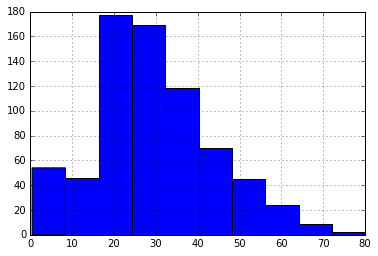

In [27]:
# use a histogram 
%pylab inline
import pylab as P
df['Age'].hist()
#P.show()

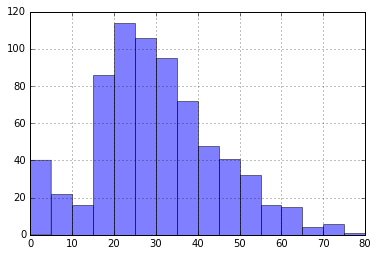

In [33]:
# explicitly drop missing values of Age
df['Age'].dropna().hist(bins=16, range=(0,80), alpha = 0.5) # we made more bins with the same range as above
P.show()                                                    # alpha is the transparency of the colored bars.

### Transforming the values to a shape for machine learning

In [36]:
df['Gender'] = 4 # Adds a new column of 4s, called 'Gender'

In [39]:
df['Gender'] = df['Sex'].map(lambda x: x[0].upper()) # take the first letter from Sex, capitalise and assign to 'Gender'
print (df['Gender'][0:5])

0    M
1    F
2    F
3    F
4    M
Name: Gender, dtype: object


But, we actually need a binary integer for female and male.

In [41]:
df['Gender'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int) # changing female to 0 and changing it to int.
print(df.Gender[0:5])

0    1
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64


We need to fill in the missing values of Age with something as most machine learning will need a complete set of values in that column in order to use Age (and we think this is useful for prediction!).
Could we fill in with mean? or median, to reduce the influence of a few oldies? A histogram is useful here.
These are the kinds of decisions you make as you create a model in a Kaggle competition.

Let's use the median age in each passenger class.
First, build a reference table to calculate what the medians are:

In [42]:
median_ages = np.zeros((2,3)) # male/female for each class
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [44]:
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & (df['Pclass'] == j + 1)]['Age'].dropna().median()
        
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

Make a new column AgeFill.

In [46]:
# Make a copy of Age
df['AgeFill'] = df['Age']

df.AgeFill[0:5]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: AgeFill, dtype: float64

In [47]:
# Just select rows with missing values and limit it to the columns important to us.
df[df['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


Fill in AgeFill based on our median_ages table.

In [54]:
for i in range(0, 2):
    for j in range(0, 3):
        # we need df.loc here to specify the row AND the column. 
        # only where age is null, gender is 1/0 and class is 1-3, that AgeFill will be set to the median age.
        df.loc[(df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j + 1), 'AgeFill'] = median_ages[i,j]

In [55]:
# Look at the same 10 rows again.
df[df['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


Now, lets create a feature that records whether Age was originally missing. 

In [57]:
# 
df['AgeIsNull'] = pd.isnull(df.Age) # returns True/ False in the AgeIsNull column
df['AgeIsNull'] = pd.isnull(df.Age).astype(int) # returns 1/0 in the AgeIsNull column.

print(df[['AgeIsNull','Gender','AgeFill','Age']][0:10])

   AgeIsNull  Gender  AgeFill   Age
0          0       1     22.0  22.0
1          0       0     38.0  38.0
2          0       0     26.0  26.0
3          0       0     35.0  35.0
4          0       1     35.0  35.0
5          1       1     25.0   NaN
6          0       1     54.0  54.0
7          0       1      2.0   2.0
8          0       0     27.0  27.0
9          0       0     14.0  14.0


### Feature Engineering

Let's create a couple of other features.     
This time using simple maths on existing columns collect Parch(n of parents or children) and SibSp(n of siblings or spouses) together to create FamilySize:

In [58]:
df['FamilySize'] = df['SibSp'] + df['Parch']

We know Pclass had a large effect on survival, possibly age too. An artificial feature combining the two could incorporate whatever predictive power might be available from both Age and Pclass by multiplying them.     
This amplifies 3rd class and older ages.

In [59]:
df['Age*Class'] = df.AgeFill * df.Pclass

At this point you could make some histograms of the new columns to understand them better

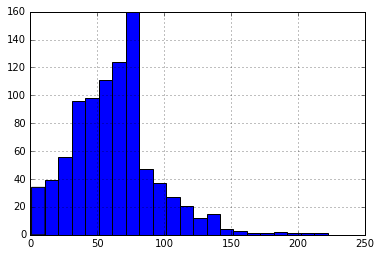

In [61]:
df['Age*Class'].hist(bins = 22)

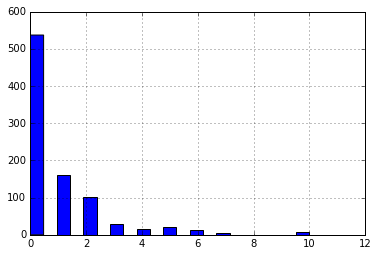

In [64]:
df['FamilySize'].hist(bins = 21)

### Final Preperation

Most ML techniques don't work on strings. Last two things to do are:    
1) determine which columns we need to change to numerics     
2) convert the final pandas.DataFrame to a numpy.array

In [66]:
# Only show the columns which are object (contain strings)
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [67]:
# drop the columns we don't want
df = df.drop(['Name','Sex','Ticket','Cabin','Embarked'], axis=1)

# can also drop Age. We have made a better column of it "AgeFill"
df = df.drop(['Age'], axis=1)

In [69]:
# Alternatively drop any rows which still have missing values
df = df.dropna()  # be careful, can drop lots of rows where there is just one column with nan

In [70]:
print(len(df))

891


In [72]:
# convert to a Numpy array using .values method
train_data = df.values
train_data

array([[   1. ,    0. ,    3. , ...,    0. ,    1. ,   66. ],
       [   2. ,    1. ,    1. , ...,    0. ,    1. ,   38. ],
       [   3. ,    1. ,    3. , ...,    0. ,    0. ,   78. ],
       ..., 
       [ 889. ,    0. ,    3. , ...,    1. ,    3. ,   64.5],
       [ 890. ,    1. ,    1. , ...,    0. ,    0. ,   26. ],
       [ 891. ,    0. ,    3. , ...,    0. ,    0. ,   96. ]])

In [73]:
# compared to the original array
data

array([['1', '0', '3', ..., '7.25', '', 'S'],
       ['2', '1', '1', ..., '71.2833', 'C85', 'C'],
       ['3', '1', '3', ..., '7.925', '', 'S'],
       ..., 
       ['889', '0', '3', ..., '23.45', '', 'S'],
       ['890', '1', '1', ..., '30', 'C148', 'C'],
       ['891', '0', '3', ..., '7.75', '', 'Q']], 
      dtype='<U82')